In [1]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.7 MB/s 
     |████████████████████████████████| 40 kB 5.9 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
from random import sample
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
source_path = 'drive/MyDrive/Colab Notebooks/Testing/'

source_path_asam = os.path.join(source_path, 'asam jawa')
source_path_cengkeh = os.path.join(source_path, 'cengkeh')
source_path_jeruk = os.path.join(source_path, 'daun jeruk')
source_path_salam = os.path.join(source_path, 'daun salam')
source_path_jahe = os.path.join(source_path, 'jahe')
source_path_kayu = os.path.join(source_path, 'kayu manis')
source_path_keluak = os.path.join(source_path, 'keluak')
source_path_kemiri = os.path.join(source_path, 'kemiri')
source_path_ketumbar = os.path.join(source_path, 'ketumbar')
source_path_kunyit = os.path.join(source_path, 'kunyit')
source_path_lada = os.path.join(source_path, 'lada hitam')
source_path_pekak = os.path.join(source_path, 'pekak')
source_path_serai = os.path.join(source_path, 'serai')

In [12]:
print(f"There are {len(os.listdir(source_path_asam))} images of daun asam jawa.")
print(f"There are {len(os.listdir(source_path_cengkeh))} images of cengkeh.")
print(f"There are {len(os.listdir(source_path_jeruk))} images of daun jeruk.")
print(f"There are {len(os.listdir(source_path_salam))} images of daun salam.")
print(f"There are {len(os.listdir(source_path_jahe))} images of jahe.")
print(f"There are {len(os.listdir(source_path_kayu))} images of kayu.")
print(f"There are {len(os.listdir(source_path_keluak))} images of keluak.")
print(f"There are {len(os.listdir(source_path_kemiri))} images of kemiri.")
print(f"There are {len(os.listdir(source_path_ketumbar))} images of ketumbar.")
print(f"There are {len(os.listdir(source_path_kunyit))} images of kunyit.")
print(f"There are {len(os.listdir(source_path_lada))} images of lada hitam.")
print(f"There are {len(os.listdir(source_path_pekak))} images of pekak.")
print(f"There are {len(os.listdir(source_path_serai))} images of serai.")

There are 115 images of daun asam jawa.
There are 104 images of cengkeh.
There are 102 images of daun jeruk.
There are 118 images of daun salam.
There are 114 images of jahe.
There are 193 images of kayu.
There are 85 images of keluak.
There are 173 images of kemiri.
There are 102 images of ketumbar.
There are 95 images of kunyit.
There are 129 images of lada hitam.
There are 109 images of pekak.
There are 102 images of serai.


In [9]:
dir = 'sample_data/rempah'

if os.path.exists(dir):
  shutil.rmtree(dir)


def create_train_test_dirs(root_path):
  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  os.mkdir(root_path)
  
  train_dir = os.path.join(root_path, 'training')
  os.mkdir(train_dir)
  test_dir = os.path.join(root_path, 'testing')
  os.mkdir(test_dir)

  train_asam_dir = os.path.join(train_dir, 'asam jawa')
  os.mkdir(train_asam_dir)
  train_cengkeh_dir = os.path.join(train_dir, 'cengkeh')
  os.mkdir(train_cengkeh_dir)
  train_jeruk_dir = os.path.join(train_dir, 'daun jeruk')
  os.mkdir(train_jeruk_dir)
  train_salam_dir = os.path.join(train_dir, 'daun salam')
  os.mkdir(train_salam_dir)
  train_jahe_dir = os.path.join(train_dir, 'jahe')
  os.mkdir(train_jahe_dir)
  train_kayu_dir = os.path.join(train_dir, 'kayu manis')
  os.mkdir(train_kayu_dir)
  train_keluak_dir = os.path.join(train_dir, 'keluak')
  os.mkdir(train_keluak_dir)  
  train_kemiri_dir = os.path.join(train_dir, 'kemiri')
  os.mkdir(train_kemiri_dir)
  train_ketumbar_dir = os.path.join(train_dir, 'ketumbar')
  os.mkdir(train_ketumbar_dir)
  train_kunyit_dir = os.path.join(train_dir, 'kunyit')
  os.mkdir(train_kunyit_dir)
  train_lada_dir = os.path.join(train_dir, 'lada')
  os.mkdir(train_lada_dir)
  train_pekak_dir = os.path.join(train_dir, 'pekak')
  os.mkdir(train_pekak_dir)
  train_serai_dir = os.path.join(train_dir, 'serai')
  os.mkdir(train_serai_dir)
  
  test_asam_dir = os.path.join(test_dir, 'asam jawa')
  os.mkdir(test_asam_dir)
  test_cengkeh_dir = os.path.join(test_dir, 'cengkeh')
  os.mkdir(test_cengkeh_dir)
  test_jeruk_dir = os.path.join(test_dir, 'daun jeruk')
  os.mkdir(test_jeruk_dir)
  test_salam_dir = os.path.join(test_dir, 'daun salam')
  os.mkdir(test_salam_dir)
  test_jahe_dir = os.path.join(test_dir, 'jahe')
  os.mkdir(test_jahe_dir)
  test_kayu_dir = os.path.join(test_dir, 'kayu manis')
  os.mkdir(test_kayu_dir)
  test_keluak_dir = os.path.join(test_dir, 'keluak')
  os.mkdir(test_keluak_dir)  
  test_kemiri_dir = os.path.join(test_dir, 'kemiri')
  os.mkdir(test_kemiri_dir)
  test_ketumbar_dir = os.path.join(test_dir, 'ketumbar')
  os.mkdir(test_ketumbar_dir)
  test_kunyit_dir = os.path.join(test_dir, 'kunyit')
  os.mkdir(test_kunyit_dir)
  test_lada_dir = os.path.join(test_dir, 'lada')
  os.mkdir(test_lada_dir)
  test_pekak_dir = os.path.join(test_dir, 'pekak')
  os.mkdir(test_pekak_dir)
  test_serai_dir = os.path.join(test_dir, 'serai')
  os.mkdir(test_serai_dir)


try:
  create_train_test_dirs(root_path=dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")
  ### END CODE HERE

In [10]:
for rootdir, dirs, files in os.walk(dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

sample_data/rempah/training
sample_data/rempah/testing
sample_data/rempah/training/daun jeruk
sample_data/rempah/training/ketumbar
sample_data/rempah/training/kemiri
sample_data/rempah/training/jahe
sample_data/rempah/training/serai
sample_data/rempah/training/kunyit
sample_data/rempah/training/keluak
sample_data/rempah/training/kayu manis
sample_data/rempah/training/lada
sample_data/rempah/training/daun salam
sample_data/rempah/training/pekak
sample_data/rempah/training/asam jawa
sample_data/rempah/training/cengkeh
sample_data/rempah/testing/daun jeruk
sample_data/rempah/testing/ketumbar
sample_data/rempah/testing/kemiri
sample_data/rempah/testing/jahe
sample_data/rempah/testing/serai
sample_data/rempah/testing/kunyit
sample_data/rempah/testing/keluak
sample_data/rempah/testing/kayu manis
sample_data/rempah/testing/lada
sample_data/rempah/testing/daun salam
sample_data/rempah/testing/pekak
sample_data/rempah/testing/asam jawa
sample_data/rempah/testing/cengkeh


In [13]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  dataset = []
  for unitData in os.listdir(SOURCE):
      data = SOURCE + unitData
      if (os.path.getsize(data) > 0):
          dataset.append(unitData)
      else:
          print(unitData + " is zero length, so ignoring.")
    
  train_data_length = int(len(dataset) * SPLIT_SIZE)
  test_data_length = int(len(dataset) - train_data_length)
  shuffled_set = random.sample(dataset, len(dataset))
  train_set = shuffled_set[0:train_data_length]
  test_set = shuffled_set[-test_data_length:]
    
  for unitData in train_set:
      temp_train_data = SOURCE + unitData
      final_train_data = TRAINING + unitData
      copyfile(temp_train_data, final_train_data)
    
  for unitData in test_set:
      temp_test_data = SOURCE + unitData
      final_test_data = TESTING + unitData
      copyfile(temp_train_data, final_test_data)

  ### END CODE HERE


In [14]:
source_path = 'drive/MyDrive/Colab Notebooks/Testing/'

source_path_asam = os.path.join(source_path, 'asam jawa/')
source_path_cengkeh = os.path.join(source_path, 'cengkeh/')
source_path_jeruk = os.path.join(source_path, 'daun jeruk/')
source_path_salam = os.path.join(source_path, 'daun salam/')
source_path_jahe = os.path.join(source_path, 'jahe/')
source_path_kayu = os.path.join(source_path, 'kayu manis/')
source_path_keluak = os.path.join(source_path, 'keluak/')
source_path_kemiri = os.path.join(source_path, 'kemiri/')
source_path_ketumbar = os.path.join(source_path, 'ketumbar/')
source_path_kunyit = os.path.join(source_path, 'kunyit/')
source_path_lada = os.path.join(source_path, 'lada hitam/')
source_path_pekak = os.path.join(source_path, 'pekak/')
source_path_serai = os.path.join(source_path, 'serai/')

train_dir = "sample_data/rempah/training"
test_dir = "sample_data/rempah/testing/"

train_asam_dir = os.path.join(train_dir, 'asam jawa/')
train_cengkeh_dir = os.path.join(train_dir, 'cengkeh/')
train_jeruk_dir = os.path.join(train_dir, 'daun jeruk/')
train_salam_dir = os.path.join(train_dir, 'daun salam/')
train_jahe_dir = os.path.join(train_dir, 'jahe/')
train_kayu_dir = os.path.join(train_dir, 'kayu manis/')
train_keluak_dir = os.path.join(train_dir, 'keluak/')
train_kemiri_dir = os.path.join(train_dir, 'kemiri/')
train_ketumbar_dir = os.path.join(train_dir, 'ketumbar/')
train_kunyit_dir = os.path.join(train_dir, 'kunyit/')
train_lada_dir = os.path.join(train_dir, 'lada/')
train_pekak_dir = os.path.join(train_dir, 'pekak/')
train_serai_dir = os.path.join(train_dir, 'serai/')

  
test_asam_dir = os.path.join(test_dir, 'asam jawa/')
test_cengkeh_dir = os.path.join(test_dir, 'cengkeh/')
test_jeruk_dir = os.path.join(test_dir, 'daun jeruk/')
test_salam_dir = os.path.join(test_dir, 'daun salam/')
test_jahe_dir = os.path.join(test_dir, 'jahe/')
test_kayu_dir = os.path.join(test_dir, 'kayu manis/')
test_keluak_dir = os.path.join(test_dir, 'keluak/')
test_kemiri_dir = os.path.join(test_dir, 'kemiri/')
test_ketumbar_dir = os.path.join(test_dir, 'ketumbar/')
test_kunyit_dir = os.path.join(test_dir, 'kunyit/')
test_lada_dir = os.path.join(test_dir, 'lada/')
test_pekak_dir = os.path.join(test_dir, 'pekak/')
test_serai_dir = os.path.join(test_dir, 'serai/')

  

# Empty directories in case you run this cell multiple times
if len(os.listdir(train_asam_dir)) > 0:
  for file in os.scandir(train_asam_dir):
    os.remove(file.path)
if len(os.listdir(train_cengkeh_dir)) > 0:
  for file in os.scandir(train_cengkeh_dir):
    os.remove(file.path)
if len(os.listdir(train_jeruk_dir)) > 0:
  for file in os.scandir(train_jeruk_dir):
    os.remove(file.path)
if len(os.listdir(train_salam_dir)) > 0:
  for file in os.scandir(train_salam_dir):
    os.remove(file.path)
if len(os.listdir(train_jahe_dir)) > 0:
  for file in os.scandir(train_jahe_dir):
    os.remove(file.path)
if len(os.listdir(train_kayu_dir)) > 0:
  for file in os.scandir(train_kayu_dir):
    os.remove(file.path)
if len(os.listdir(train_keluak_dir)) > 0:
  for file in os.scandir(train_keluak_dir):
    os.remove(file.path)
if len(os.listdir(train_kemiri_dir)) > 0:
  for file in os.scandir(train_kemiri_dir):
    os.remove(file.path)
if len(os.listdir(train_ketumbar_dir)) > 0:
  for file in os.scandir(train_ketumbar_dir):
    os.remove(file.path)
if len(os.listdir(train_kunyit_dir)) > 0:
  for file in os.scandir(train_kunyit_dir):
    os.remove(file.path)
if len(os.listdir(train_lada_dir)) > 0:
  for file in os.scandir(train_lada_dir):
    os.remove(file.path)
if len(os.listdir(train_pekak_dir)) > 0:
  for file in os.scandir(train_pekak_dir):
    os.remove(file.path)
if len(os.listdir(train_serai_dir)) > 0:
  for file in os.scandir(train_serai_dir):
    os.remove(file.path)
    
if len(os.listdir(test_asam_dir)) > 0:
  for file in os.scandir(test_asam_dir):
    os.remove(file.path)
if len(os.listdir(test_cengkeh_dir)) > 0:
  for file in os.scandir(test_cengkeh_dir):
    os.remove(file.path)
if len(os.listdir(test_jeruk_dir)) > 0:
  for file in os.scandir(test_jeruk_dir):
    os.remove(file.path)
if len(os.listdir(test_salam_dir)) > 0:
  for file in os.scandir(test_salam_dir):
    os.remove(file.path)
if len(os.listdir(test_jahe_dir)) > 0:
  for file in os.scandir(test_jahe_dir):
    os.remove(file.path)
if len(os.listdir(test_kayu_dir)) > 0:
  for file in os.scandir(test_kayu_dir):
    os.remove(file.path)
if len(os.listdir(test_keluak_dir)) > 0:
  for file in os.scandir(test_keluak_dir):
    os.remove(file.path)
if len(os.listdir(test_kemiri_dir)) > 0:
  for file in os.scandir(test_kemiri_dir):
    os.remove(file.path)
if len(os.listdir(test_ketumbar_dir)) > 0:
  for file in os.scandir(test_ketumbar_dir):
    os.remove(file.path)
if len(os.listdir(test_kunyit_dir)) > 0:
  for file in os.scandir(test_kunyit_dir):
    os.remove(file.path)
if len(os.listdir(test_lada_dir)) > 0:
  for file in os.scandir(test_lada_dir):
    os.remove(file.path)
if len(os.listdir(test_pekak_dir)) > 0:
  for file in os.scandir(test_pekak_dir):
    os.remove(file.path)
if len(os.listdir(test_serai_dir)) > 0:
  for file in os.scandir(test_serai_dir):
    os.remove(file.path)
    

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(source_path_asam, train_asam_dir, test_asam_dir, split_size)
split_data(source_path_cengkeh, train_cengkeh_dir, test_cengkeh_dir, split_size)
split_data(source_path_jeruk, train_jeruk_dir, test_jeruk_dir, split_size)
split_data(source_path_salam, train_salam_dir, test_salam_dir, split_size)
split_data(source_path_jahe, train_jahe_dir, test_jahe_dir, split_size)
split_data(source_path_kayu, train_kayu_dir, test_kayu_dir, split_size)
split_data(source_path_keluak, train_keluak_dir, test_keluak_dir, split_size)
split_data(source_path_kemiri, train_kemiri_dir, test_kemiri_dir, split_size)
split_data(source_path_ketumbar, train_ketumbar_dir, test_ketumbar_dir, split_size)
split_data(source_path_kunyit, train_kunyit_dir, test_kunyit_dir, split_size)
split_data(source_path_lada, train_lada_dir, test_lada_dir, split_size)
split_data(source_path_pekak, train_pekak_dir, test_pekak_dir, split_size)
split_data(source_path_serai, train_serai_dir, test_serai_dir, split_size)


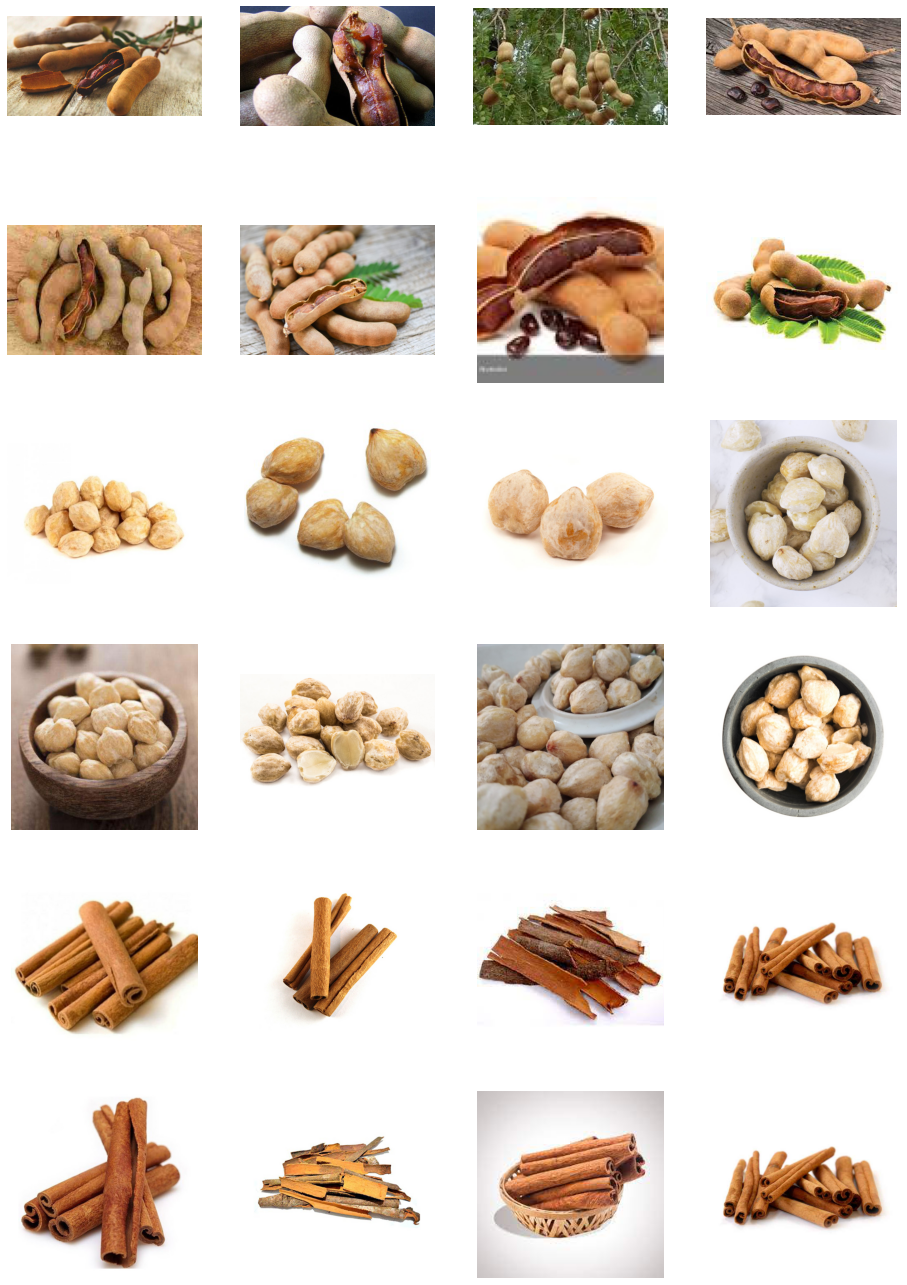

In [15]:
%matplotlib inline


import matplotlib.image as mpimg
nrows = 6
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_asam = [os.path.join(source_path_asam, fname) 
                for fname in os.listdir(source_path_asam)[pic_index-8:pic_index]]
next_kemiri = [os.path.join(source_path_kemiri, fname) 
                for fname in os.listdir(source_path_kemiri)[pic_index-8:pic_index]]
next_kayu = [os.path.join(source_path_kayu, fname) 
                for fname in os.listdir(source_path_kayu)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_asam+next_kemiri+next_kayu):
  img = mpimg.imread(img_path)
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.imshow(img)
  sp.axis('Off')
plt.show()

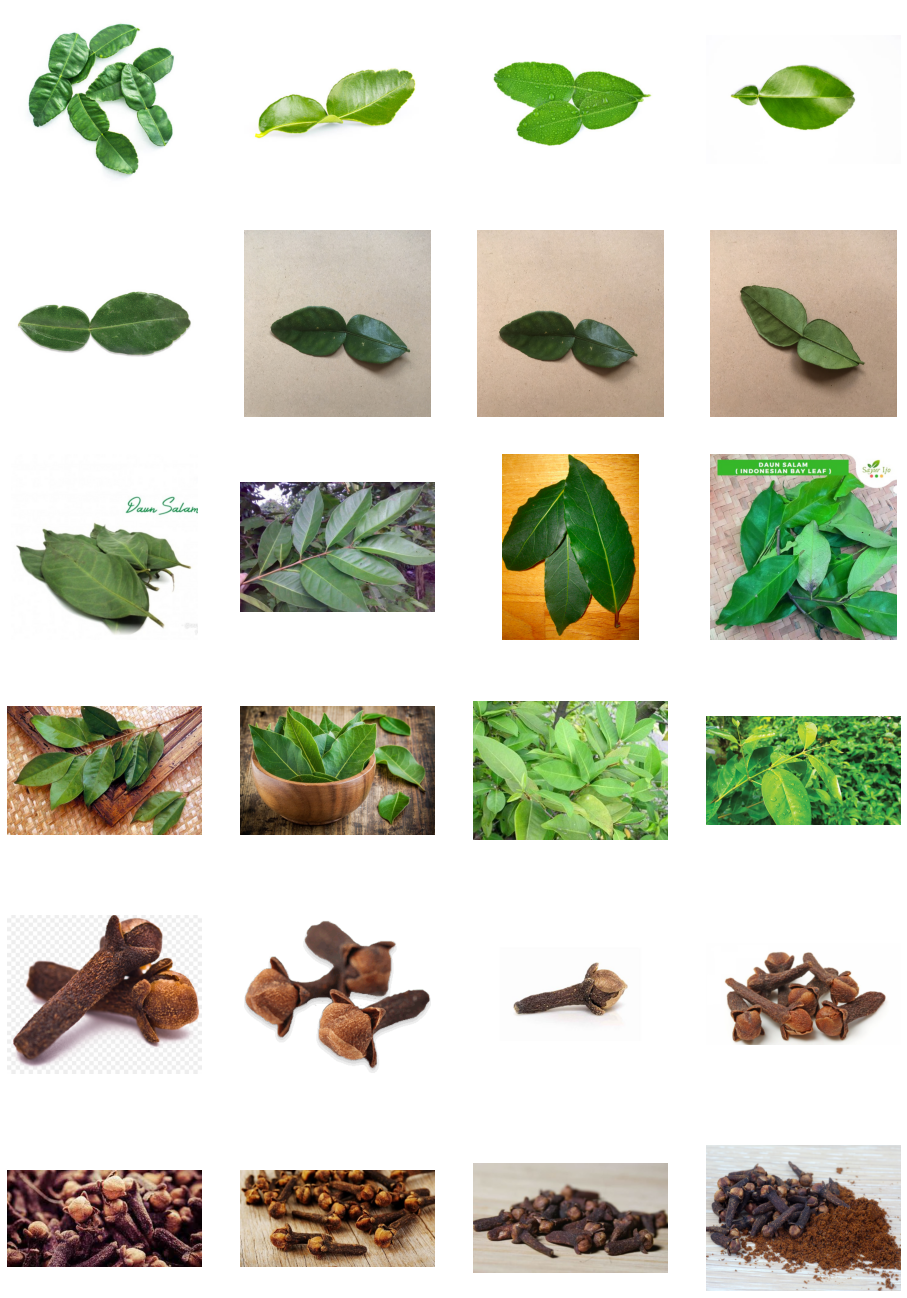

In [16]:
nrows = 6
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_jeruk = [os.path.join(source_path_jeruk, fname) 
                for fname in os.listdir(source_path_jeruk)[pic_index-8:pic_index]]
next_salam = [os.path.join(source_path_salam, fname) 
                for fname in os.listdir(source_path_salam)[pic_index-8:pic_index]]
next_cengkeh = [os.path.join(source_path_cengkeh, fname) 
                for fname in os.listdir(source_path_cengkeh)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_jeruk+next_salam+next_cengkeh):
  img = mpimg.imread(img_path)
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.imshow(img)
  sp.axis('Off')
plt.show()

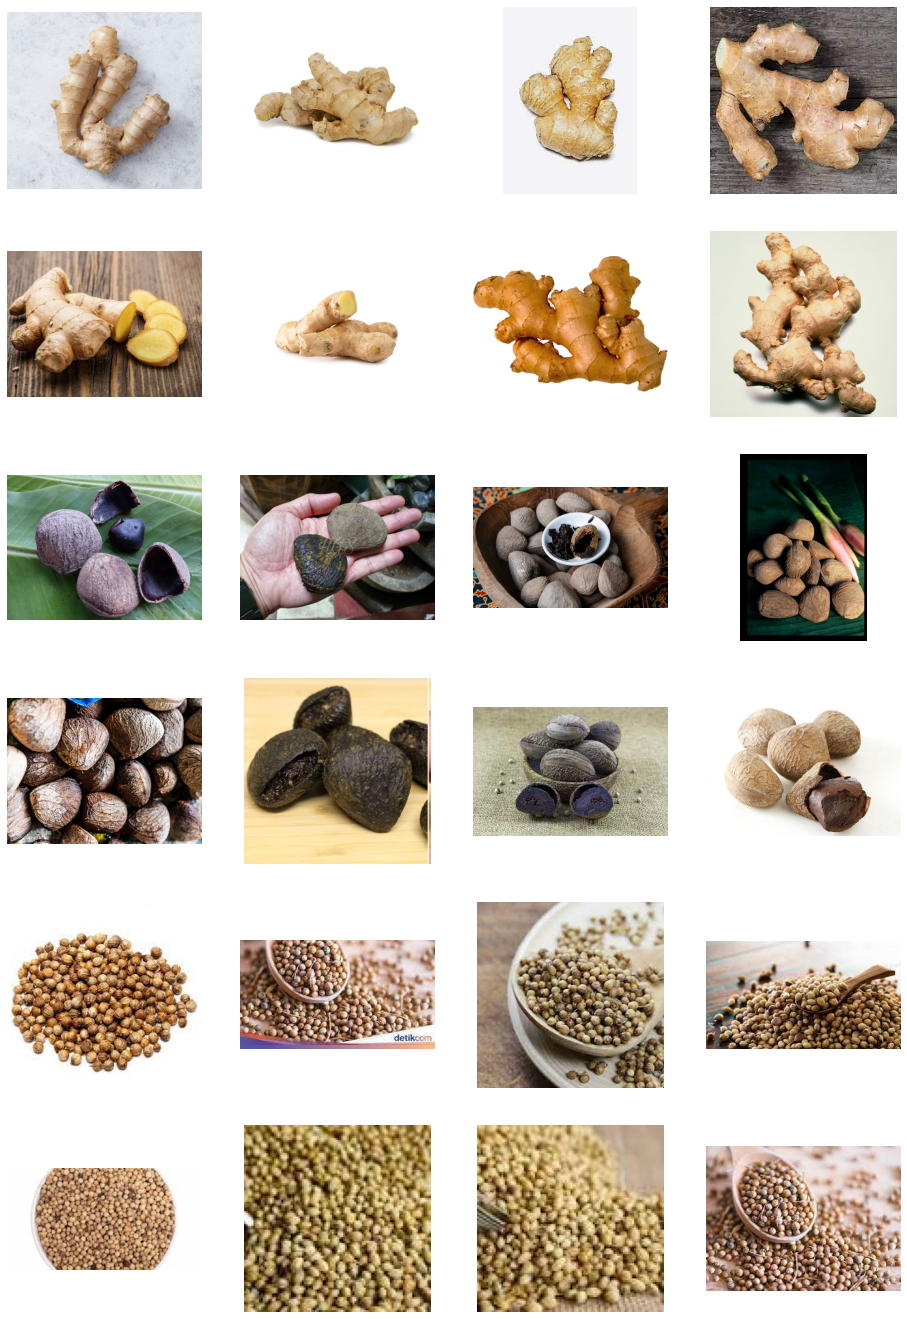

In [17]:
nrows = 6
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_jahe = [os.path.join(source_path_jahe, fname) 
                for fname in os.listdir(source_path_jahe)[pic_index-8:pic_index]]
next_keluak = [os.path.join(source_path_keluak, fname) 
                for fname in os.listdir(source_path_keluak)[pic_index-8:pic_index]]
next_ketumbar = [os.path.join(source_path_ketumbar, fname) 
                for fname in os.listdir(source_path_ketumbar)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_jahe+next_keluak+next_ketumbar):
  img = mpimg.imread(img_path)
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.imshow(img)
  sp.axis('Off')
plt.show()

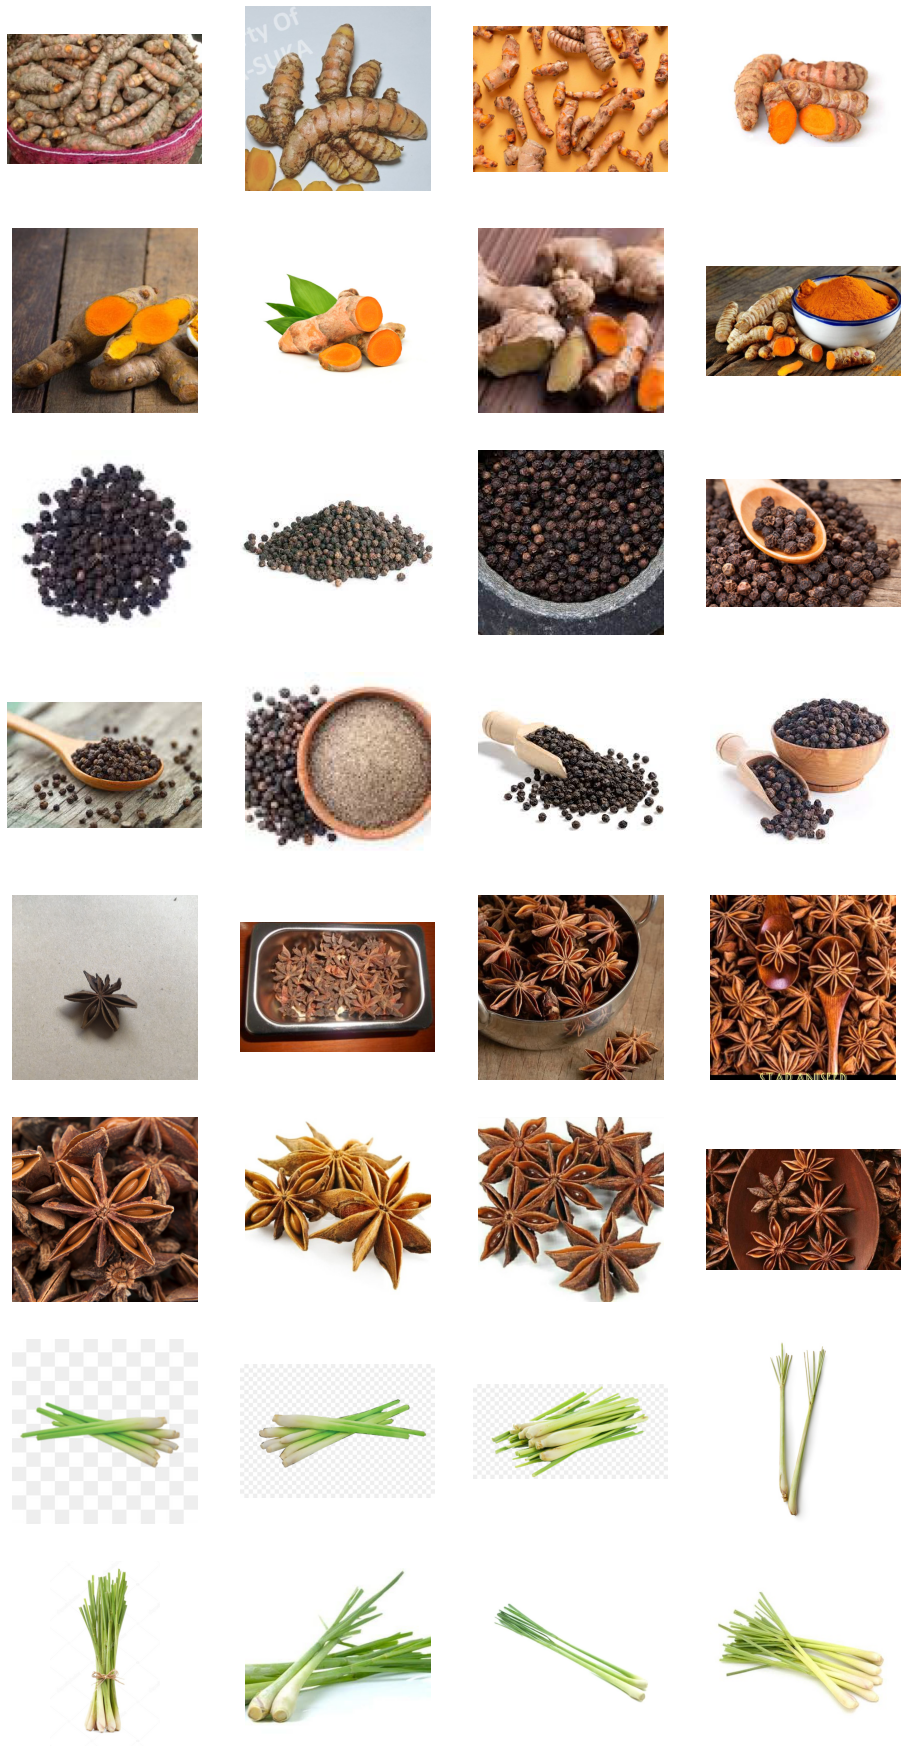

In [18]:
nrows = 8
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_kunyit = [os.path.join(source_path_kunyit, fname) 
                for fname in os.listdir(source_path_kunyit)[pic_index-8:pic_index]]
next_lada = [os.path.join(source_path_lada, fname) 
                for fname in os.listdir(source_path_lada)[pic_index-8:pic_index]]
next_pekak = [os.path.join(source_path_pekak, fname) 
                for fname in os.listdir(source_path_pekak)[pic_index-8:pic_index]]
next_serai = [os.path.join(source_path_serai, fname) 
                for fname in os.listdir(source_path_serai)[pic_index-8:pic_index]]                

for i, img_path in enumerate(next_kunyit+next_lada+next_pekak+next_serai):
  img = plt.imread(img_path, 0)
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.imshow(img)
  sp.axis('Off')
plt.show()

In [19]:
batch_size=32
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                    #  rotation_range=90,
                                    #  width_shift_range=0.2,
                                    #  height_shift_range=0.2,
                                    #  horizontal_flip=True,
                                    #  vertical_flip=False,
                                    #  shear_range=0.3,
                                    #  zoom_range=0.3,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=batch_size,
                                                      class_mode='categorical',
                                                      color_mode= "rgb",
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=batch_size,
                                                                class_mode='categorical',
                                                                color_mode= "rgb",
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [20]:
# Test your generators
train_generator, validation_generator = train_val_generators(train_dir, test_dir)

Found 1336 images belonging to 13 classes.
Found 150 images belonging to 13 classes.


###Model 


In [21]:
# from tensorflow.keras.optimizers import RMSprop
# GRADED FUNCTION: create_model
def create_model():

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(), 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), 
    # 1024 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(13, activation='softmax')  
  ])

  model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
    
  ### END CODE HERE

  return model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    if(logs.get('val_loss') < 0.1):
      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so stop the training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [22]:
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=25,
                    verbose=1,
                    # callbacks = [callbacks],
                    steps_per_epoch = 40, 
                    validation_steps = 5,
                    validation_data = validation_generator
                   )

Epoch 1/25
 4/40 [==>...........................] - ETA: 29s - loss: 2.5569 - accuracy: 0.0938

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


40/40 [==============================] - 43s 1s/step - loss: 2.4959 - accuracy: 0.1588 - val_loss: 2.3377 - val_accuracy: 0.3267
Epoch 2/25
40/40 [==============================] - 40s 982ms/step - loss: 2.1851 - accuracy: 0.3113 - val_loss: 1.8097 - val_accuracy: 0.3667
Epoch 3/25
40/40 [==============================] - 41s 1s/step - loss: 1.7853 - accuracy: 0.4159 - val_loss: 1.4909 - val_accuracy: 0.6400
Epoch 4/25
40/40 [==============================] - 41s 1s/step - loss: 1.5088 - accuracy: 0.4851 - val_loss: 1.2037 - val_accuracy: 0.6200
Epoch 5/25
40/40 [==============================] - 40s 990ms/step - loss: 1.2965 - accuracy: 0.5763 - val_loss: 1.0242 - val_accuracy: 0.7467
Epoch 6/25
40/40 [==============================] - 40s 1s/step - loss: 1.1230 - accuracy: 0.6454 - val_loss: 0.9603 - val_accuracy: 0.6933
Epoch 7/25
40/40 [==============================] - 41s 998ms/step - loss: 1.0079 - accuracy: 0.6706 - val_loss: 0.8192 - val_accuracy: 0.8200
Epoch 8/25
40/40 [====

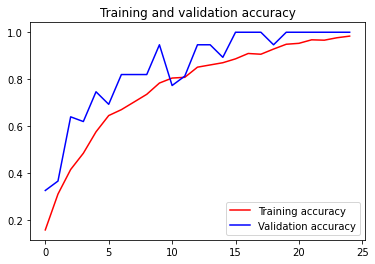

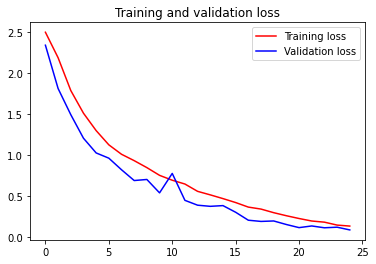

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0) 
plt.figure()


plt.show()

print(train_generator)

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

label = ['asam jawa', 'cengkeh', 'daun jeruk', 'daun salam', 'jahe', 'kayu manis', 'keluak', 'kemiri', 'ketumbar', 'kunyit', 'lada hitam', 'pekak','serai']
uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  # classes_predict = model.predict_classes(images)

  # print(fn)
  print(label[np.argmax(classes)])

Saving kemir.jpg to kemir.jpg
kemiri


In [25]:
export_dir = 'drive/MyDrive/Colab Notebooks/Testing/saved_model/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: drive/MyDrive/Colab Notebooks/Testing/saved_model/assets


In [26]:
model.save("spezia_model.h5")

In [27]:
tfjs.converters.save_keras_model(model, 'drive/MyDrive/Colab Notebooks/Testing/modeljs/')

In [28]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [29]:
import pathlib
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

19541968

In [30]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>